# EMPLOYEE CHURN PREDICTION

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

In [3]:
dataset=pd.read_csv("./HR_comma_sep.csv")

for displaying the information about the dataset there is a info() function.

In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In the data set there are 14999 rows and 10 columns and there are no null values in the dataset .

groupby() function is used to group the similar data values.

In [4]:
employeesleft=dataset.groupby('left')
employeesleft.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The summary statistics of the dataset is given by describe() function.

In [5]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


DATA ANALYSIS

Text(0.5,1,'LAST_EVALUATION')

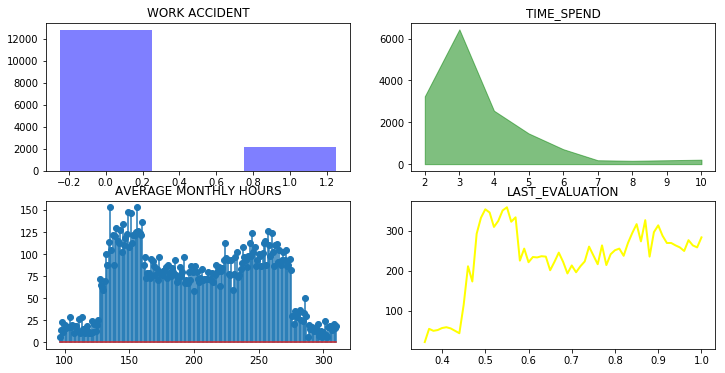

In [108]:
left_count=dataset.groupby('left').count()
no_of_projects =dataset.groupby('number_project').count()
left1=no_of_projects[['left']]
Work =dataset.groupby('Work_accident').count()
time =dataset.groupby('time_spend_company').count()
hours =dataset.groupby('average_montly_hours').count()
evaluation =dataset.groupby('last_evaluation').count()
promotion =dataset.groupby('promotion_last_5years').count()
fig, axes = plt.subplots(2,2, figsize=(12,6))
# axes[0,0].scatter(no_of_projects.index.values,np.array(left1['left']),color="black")
# axes[0,0].set_title("scatter")


#axes[0,1].step(promotion_last_5years.index.values,promotion['left'],lw=2,color="red")
#axes[0,1].set_title("step")

axes[0,0].bar(Work.index.values,Work['left'], align="center", width=0.5, alpha=0.5,color="blue")
axes[0,0].set_title("WORK ACCIDENT")

axes[0,1].fill_between( time.index.values,time['left'],color="green", alpha=0.5);
axes[0,1].set_title("TIME_SPEND");


axes[1,0].stem(hours.index.values,hours['left'])
axes[1,0].set_title("AVERAGE MONTHLY HOURS")

axes[1,1].plot(evaluation.index.values,evaluation['left'],linewidth=2.0,color="yellow")
axes[1,1].set_title("LAST_EVALUATION")

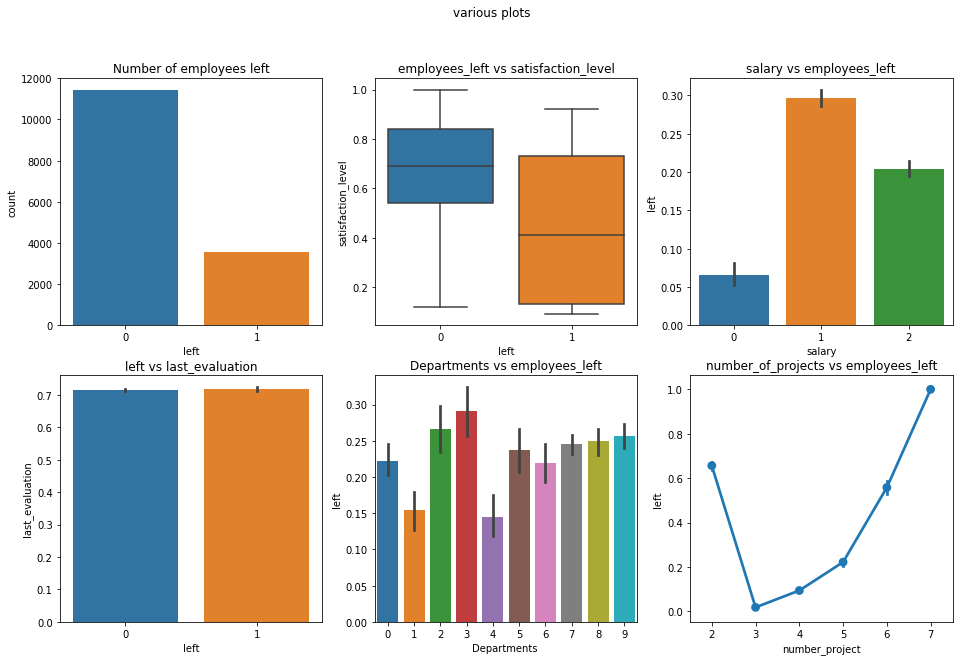

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))
 
fig.suptitle('various plots')
axes[0, 0].title.set_text("Number of employees left")
axes[0, 1].title.set_text("employees_left vs satisfaction_level")
axes[0, 2].title.set_text("salary vs employees_left")
axes[1, 0].title.set_text("left vs last_evaluation")
axes[1, 1].title.set_text("Departments vs employees_left")
axes[1, 2].title.set_text("number_of_projects vs employees_left")
sb.countplot(ax=axes[0, 0], data=dataset, x='left')
sb.boxplot(ax=axes[0, 1], data=dataset, x='left', y='satisfaction_level')
sb.barplot(ax=axes[0, 2], data=dataset, x='salary', y='left')
sb.barplot(ax=axes[1, 0], data=dataset, x='left', y='last_evaluation')
sb.barplot(ax=axes[1, 1], data=dataset, x='Departments ', y='left')
sb.pointplot(ax=axes[1, 2], data=dataset, x='number_project', y='left')


DATA REPROCESSING

In [109]:
df=pd.DataFrame(dataset)

In [107]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
dlabel = le.fit_transform(df['Departments '])

# printing label
df['Departments '] = dlabel
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
6,0.10,0.77,6,247,4,0,1,0,7,1
7,0.92,0.85,5,259,5,0,1,0,7,1
8,0.89,1.00,5,224,5,0,1,0,7,1
9,0.42,0.53,2,142,3,0,1,0,7,1


In [65]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
dlabel = le.fit_transform(df['salary'])
df['salary'] = dlabel
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
6,0.10,0.77,6,247,4,0,1,0,7,1
7,0.92,0.85,5,259,5,0,1,0,7,1
8,0.89,1.00,5,224,5,0,1,0,7,1
9,0.42,0.53,2,142,3,0,1,0,7,1


DATA MODELLING USING LOGISTIC REGRESSION

In [66]:
x1=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y1=df['left']

In [67]:
# Splitting the dataset into training and test sets.  
from sklearn.model_selection import train_test_split  
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.25, random_state=0)

In [68]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler    
std_x= StandardScaler()    
x1_train= std_x.fit_transform(x1_train)    
x1_test= std_x.transform(x1_test)

In [69]:
from sklearn.linear_model import LogisticRegression  
classifier1= LogisticRegression(random_state=0)  
classifier1.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
y1_pred= classifier1.predict(x1_test)

In [71]:
from sklearn.metrics import confusion_matrix  
confusion_m= confusion_matrix(y1_test,y1_pred)
print(confusion_m)

[[2643  238]
 [ 649  220]]


PERFORMANCE OF THE MODEL

In [72]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
score = metrics.f1_score(y1_test, y1_pred)
print('F-Measure:%.3f'% score)

Accuracy: 0.7634666666666666
Precision: 0.48034934497816595
Recall: 0.25316455696202533
F-Measure:0.332
